# Experimenting with tracking in Bifacial Radiance

This journal supports the process of designing a solar panel configuration to appropriately represent and Agripv setup with varying parameters.
The goal of this journal is to test and compare the irradiance values when changing certain parameters. Only one paramater is changed at a time. 


Details:
*	Location: lat = 32.25, -110.9 (Tuscon, Arizona)
*	Racking: single axis tracking panels
*	Panel size: 1m x 2m                                    
*	Analysis variations:
<ul> 
<li> a.	Hub Height: would like to look at multiple heights ([1, 1.5, 2, 2.5 meters]) </li> 



In [103]:
import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bifacialvf

In [104]:
testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' /  'Experiment_2')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
resultsfolder = os.path.join(testfolder, 'results')

### General Parameters and Variables

In [105]:
ft2m = 0.3048
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           

# Constants
azimuth = 180                 
albedo = 0.2  # Changed from 0.31 for test 6/9/22
x = 1
y = 2 
xgap =  0.02
ygap = 0 # Meters
# D (meters)is a variable that represents the spacing between rows, not-considering the collector areas.
D = 2.8    
    
nMods = 20
nRows = 7
numpanels = 1
moduletype = 'test-module' #Need to make sure this is right module
hpc = False
sim_general_name = 'Rad_Experiment2'
CW = x * numpanels
    
#Arrays for loops  What should we Loop
hub_heights = np.array([1,1.5,2,2.5]) # height/ collector width 1
GCRs = [0.28,0.33,0.4,0.6]

#Defaults
hub_height_def = hub_heights[1]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def



 ## View Geometry with gendaylit

In [84]:
# Havn't figured this out yet for tracking
starttime =pd.to_datetime('2021-06-01 01:00:0')
endtime = pd.to_datetime('2021-06-30 23:00:0')
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
metdata=demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021)
timestamp = metdata.datetime.index(pd.to_datetime('2021-06-01 13:00:0 -8'))
demo.gendaylit(timestamp)  # Use this to simulate only one hour at a time.
azimuth_test = 180
pitch = pitch_def
sim_name = sim_general_name+'_az_'+str(round(azimuth,1))
module = demo.makeModule(name=moduletype, x=x, y=y,numpanels = numpanels, xgap=xgap, ygap=ygap)
sceneDict = {'tilt':20,'pitch':pitch,'hub_height':hub_height_def,'azimuth':azimuth_test,'nMods': nMods,'nRows': nRows}
scene = demo.makeScene1axis(trackerdict=trackerdict,cumulativesky=False,moduletype=moduletype,sceneDict=sceneDict)
octfile = demo.makeOct(demo.getfilelist()) 
!rvu -vf views\front.vp -e .01 -pe 0.4 -vp 3.5 -20 22 1axis_2021-06-01_1100.oct

path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Loading albedo, 1 value(s), 0.310 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Created Rad_Experiment2.oct


## Create cumulative sky for tracking

In [106]:
starttime =pd.to_datetime('2021-06-01 01:00:0')
endtime = pd.to_datetime('2021-06-30 23:00:0')
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
metdata = demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021) # Name and path
limit_angle = 60 # tracker rotation limit angle. Setting it ridiculously small so this runs faster.
angledelta = 10 # sampling between the limit angles. 
backtrack = True
gcr = GCR_def
cumulativesky = True # This is important 
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = cumulativesky)
trackerdict = demo.genCumSky1axis()


path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Making path: images
Making path: objects
Making path: results
Making path: skies
Making path: EPWs
Making path: materials
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Saving file EPWs\1axis_-60.0.csv, # points: 30
Saving file EPWs\1axis_-50.0.csv, # points: 30
Saving file EPWs\1axis_-40.0.csv, # points: 30
Saving file EPWs\1axis_-30.0.csv, # points: 60
Saving file EPWs\1axis_-10.0.csv, # points: 60
Saving file EPWs\1axis_0.0.csv, #

## Setup length, width and sensors for scene

In [111]:
# Parameters for scene size and sensor starts
sensorsx_fb = [1,1]
sensorsy_fb = [4,6*numpanels]
sensorsx_gb = [50,50] 
sensorsy_gb = [1,1]

##  Varying Hub Height

In [112]:
# This takes an extremely long time. Decrease hub heights tested to shorten
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all hub heights
    hub_height = hub_heights[hh]
    customname = 'HubHeight_'+ str(hub_height)
    xinc = pitch_def/(sensorsx_gb[0]-1)
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(hub_height)+'.csv')
    sim_name = sim_general_name+'_HubHeight_'+str(hub_height)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':xinc,'yinc':0,'xstart':0} #Switch xinc and yinc xstart:0
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height, 'nMods': 20, 'nRows': 7}  
    scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=cumulativesky) 
    octfile = demo.makeOct1axis(trackerdict = scene) 
    trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=customname, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making .rad files for cumulativesky 1-axis workflow
12 Radfiles created in /objects/

Making 12 octfiles in root directory.
Created 1axis_-60.0.oct
Created 1axis_-50.0.oct
Created 1axis_-40.0.oct
Created 1axis_-30.0.oct
Created 1axis_-10.0.oct
Created 1axis_0.0.oct
Created 1axis_10.0.oct
Created 1axis_20.0.oct
Created 1axis_30.0.oct
Created 1axis_40.0.oct
Created 1axis_50.0.oct
Created 1axis_60.0.oct
Linescan in process: 1axis_-60.0HubHeight_1.0_Front
Linescan in process: 1axis_-60.0HubHeight_1.0_Back
Saved: results\irr_1axis_-60.0HubHeight_1.0.csv
Index: -60.0. Wm2Front: 400.27700200000004. Wm2Back: 398.89589599999994
Linescan in process: 1axis_-50.0HubHeight_1.0_Front
Linescan in process: 1axis_-50.0HubHeight_1.0_Back
Saved: results\irr_1axis_-50.0HubHeight_1.0.csv
Index: -50.0. Wm2Front: 597.448354. Wm2Back: 462.76768799999996
Linescan in process: 

Linescan in process: 1axis_-10.0HubHeight_2.0_Back
Saved: results\irr_1axis_-10.0HubHeight_2.0.csv
Index: -10.0. Wm2Front: 1327.2245. Wm2Back: 2114.44912
Linescan in process: 1axis_0.0HubHeight_2.0_Front
Linescan in process: 1axis_0.0HubHeight_2.0_Back
Saved: results\irr_1axis_0.0HubHeight_2.0.csv
Index: 0.0. Wm2Front: 1552.5573399999996. Wm2Back: 2167.2971000000002
Linescan in process: 1axis_10.0HubHeight_2.0_Front
Linescan in process: 1axis_10.0HubHeight_2.0_Back
Saved: results\irr_1axis_10.0HubHeight_2.0.csv
Index: 10.0. Wm2Front: 2141.17854. Wm2Back: 746.262472
Linescan in process: 1axis_20.0HubHeight_2.0_Front
Linescan in process: 1axis_20.0HubHeight_2.0_Back
Saved: results\irr_1axis_20.0HubHeight_2.0.csv
Index: 20.0. Wm2Front: 1856.9474799999998. Wm2Back: 1356.97666
Linescan in process: 1axis_30.0HubHeight_2.0_Front
Linescan in process: 1axis_30.0HubHeight_2.0_Back
Saved: results\irr_1axis_30.0HubHeight_2.0.csv
Index: 30.0. Wm2Front: 21828.8856. Wm2Back: 1778.1641
Linescan in pro

## Ground Irradiance Hub Height Comparison Graph

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_1.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_1.5.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_2.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_2.5.csv


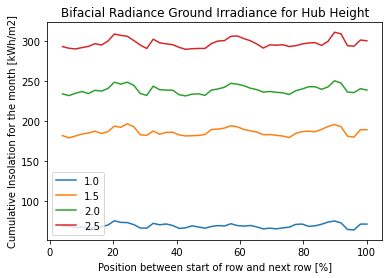

In [114]:
for hh in range (0, len(hub_heights)):
    hub_height = hub_heights[hh]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_HubHeight_'+str(hub_height)+'.csv'
    print(Radiance_File)
    (data2, metadata) = loadVFresults(Radiance_File)
    data_line = data2
    data_line_f = data_line[::-1].reset_index(drop = True) 
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "rearZ",data_line_f.columns[4]: "matttype",data_line_f.columns[5]: "rearMat,",data_line_f.columns[6]: "Wm2Front",data_line_f.columns[7]: "Wm2Back",data_line_f.columns[8]: "Back/FrontRatio"}, inplace = True)
   
    yshift = data_line_f['y'] # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch_def)*100
    module_end = (2/pitch_def)*100 #Percentage between rows where the module ends)
    plt.figure(1)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=hub_height)
    plt.title('Bifacial Radiance Ground Irradiance for Hub Height')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Part 3 Varying GCR

In [120]:
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
for gc in range (0, len(GCRs)):
    #Build scene and run raytracing for all 3 azimuths
    GCR = GCRs[gc]
    trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = GCR, cumulativesky = cumulativesky)
    trackerdict = demo.genCumSky1axis()
    pitch = CW/GCR 
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    sim_name = sim_general_name+'_GCR_'+str(GCR)
    #Build scene and run raytracing 
    customname = 'GCR_'+ str(GCR)
    xinc = pitch_def/(sensorsx_gb[0]-1)
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    sim_name = sim_general_name+'_GCR_'+str(GCR)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':xinc,'yinc':0}
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height_def, 'nMods': 20, 'nRows': 7}  
    scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=cumulativesky) 
    octfile = demo.makeOct1axis(trackerdict = scene) 
    trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=customname, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten

Saving file EPWs\1axis_-60.0.csv, # points: 30
Saving file EPWs\1axis_-50.0.csv, # points: 52
Saving file EPWs\1axis_-40.0.csv, # points: 38
Saving file EPWs\1axis_-30.0.csv, # points: 30
Saving file EPWs\1axis_-10.0.csv, # points: 60
Saving file EPWs\1axis_0.0.csv, # points: 30
Saving file EPWs\1axis_10.0.csv, # points: 11
Saving file EPWs\1axis_20.0.csv, # points: 19
Saving file EPWs\1axis_30.0.csv, # points: 44
Saving file EPWs\1axis_40.0.csv, # points: 46
Saving file EPWs\1axis_50.0.csv, # points: 26
Saving file EPWs\1axis_60.0.csv, # points: 34
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-60.0.rad
message: There were 52 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-50.0.rad
message: There were 38 sun up hours in this climate file
Total Ibh/Lbh

Linescan in process: 1axis_-30.0GCR_0.33_Back
Saved: results\irr_1axis_-30.0GCR_0.33.csv
Index: -30.0. Wm2Front: 1268.7475. Wm2Back: 1830.62764
Linescan in process: 1axis_-10.0GCR_0.33_Front
Linescan in process: 1axis_-10.0GCR_0.33_Back
Saved: results\irr_1axis_-10.0GCR_0.33.csv
Index: -10.0. Wm2Front: 1033.4978019999999. Wm2Back: 1911.4466400000001
Linescan in process: 1axis_0.0GCR_0.33_Front
Linescan in process: 1axis_0.0GCR_0.33_Back
Saved: results\irr_1axis_0.0GCR_0.33.csv
Index: 0.0. Wm2Front: 1687.0875799999997. Wm2Back: 2016.2284600000003
Linescan in process: 1axis_10.0GCR_0.33_Front
Linescan in process: 1axis_10.0GCR_0.33_Back
Saved: results\irr_1axis_10.0GCR_0.33.csv
Index: 10.0. Wm2Front: 554.537286. Wm2Back: 692.501198
Linescan in process: 1axis_20.0GCR_0.33_Front
Linescan in process: 1axis_20.0GCR_0.33_Back
Saved: results\irr_1axis_20.0GCR_0.33.csv
Index: 20.0. Wm2Front: 1217.339174. Wm2Back: 1186.039
Linescan in process: 1axis_30.0GCR_0.33_Front
Linescan in process: 1axis_

message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-40.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-30.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-20.0.rad
message: There were 60 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-10.0.rad
message: There were 58 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_-0.0.rad
message: There were 40 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_10.0.rad
message: There were 49 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_20.0.rad
message: There were 30 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created skyfile skies\1axis_30.0.rad
message: There were 60 sun up hours in this climate 

## Ground Irradiance GCR Comparison

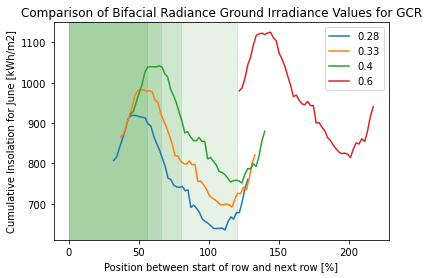

In [121]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    from bifacialvf import loadVFresults
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\cumulative_results_GCR_'+str(GCR)+'.csv'
    (data2, metadata) = loadVFresults(Radiance_File)
    
    pitch = CW/GCR
    module_end = (2/pitch)*100 #Percentage between rows where the module ends)
    data_line = data2
    data_line_f = data_line[::-1].reset_index(drop = True) #Flip the column
    data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "rearZ",data_line_f.columns[4]: "mattype",data_line_f.columns[5]: "rearMat",data_line_f.columns[6]: "Wm2Front",data_line_f.columns[7]: "Wm2Back",data_line_f.columns[8]: "Back/FrontRatio"}, inplace = True) 
   
    
    yshift = data_line_f['y'] + 1 # Shift x_axis so it starts at 0 and not -1
    ystep = (yshift/pitch)*100
    plt.figure(1)
    Radiance = plt.plot(ystep,data_line_f['Wm2Front']/1000, label=GCR)
    plt.title('Comparison of Bifacial Radiance Ground Irradiance Values for GCR')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for June [kWh/m2]')
    plt.axvspan(0, module_end, alpha=.1, color='green')
    plt.legend()

## Hourly Tracking

In [45]:
# Simulate hourly to see what scene loos like at specific hours
demo = bifacial_radiance.RadianceObj(sim_general_name,str(testfolder)) 
demo.setGround(albedo)
epwfile = demo.getEPW(lat,lon)  
starttime = '06_01';  endtime = '06_01' 
metdata = demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime, coerce_year = 2021) # Name and path
#metdata=demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime)
limit_angle = 60 # tracker rotation limit angle. Setting it ridiculously small so this runs faster.
angledelta = 10 # sampling between the limit angles. 
backtrack = True
gcr = GCR_def
cumulativesky = True # This is important 
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, angledelta = angledelta, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = False)
trackerdict = demo.gendaylit1axis() 
trackerkeys = sorted(trackerdict.keys())

path = C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2
Loading albedo, 1 value(s), 0.310 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Creating ~14 skyfiles. 
Created 14 skyfiles in /skies/


In [46]:
print(trackerkeys)

['2021-06-01_0600', '2021-06-01_0700', '2021-06-01_0800', '2021-06-01_0900', '2021-06-01_1000', '2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500', '2021-06-01_1600', '2021-06-01_1700', '2021-06-01_1800', '2021-06-01_1900']


In [57]:
module = demo.makeModule(name=moduletype, x=x, y=y, xgap=xgap, ygap=ygap)
times = ['2021-06-01_0600', '2021-06-01_0700', '2021-06-01_0800', '2021-06-01_0900', '2021-06-01_1000', '2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500', '2021-06-01_1600', '2021-06-01_1700', '2021-06-01_1800', '2021-06-01_1900']
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    hub_height = hub_heights[hh]
    yinc = pitch_def/(sensorsy_gb[0]-1)
    modscanfront = {'zstart': 0.05, 'zinc': 0,'orient': '0 0 -1', 'xinc':0,'yinc':yinc}
    sceneDict = {'tilt':0,'pitch': pitch_def,'hub_height':hub_height, 'nMods': 20, 'nRows': 7}  
    for time in times:
        writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_hourly_'+str(hub_height)+time+'.csv')
        sim_name = sim_general_name+'_HubHeight_'+str(hub_height)
        octfile = demo.makeOct1axis(trackerdict = scene, singleindex=time)
        demo.makeOct1axis(singleindex=time)
        scene = demo.makeScene1axis(trackerdict = trackerdict, module = module, sceneDict = sceneDict, cumulativesky=False) 
        trackerdict = demo.analysis1axis(trackerdict, modscanfront=modscanfront,customname=sim_name, sensorsx=sensorsx_gb,sensorsy=sensorsy_gb, singleindex=time)


Module Name: test-module
Module test-module updated in module.json
Pre-existing .rad file objects\test-module.rad will be overwritten


Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0600.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0600.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0_Front
Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0_Back
Saved: results\irr_1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.0.csv
Index: 2021-06-01_0600. Wm2Front: 8.423202439999999. Wm2Back: 2.488872232

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0700Rad_Experim

Linescan in process: 1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.5_Back
Saved: results\irr_1axis_2021-06-01_0600Rad_Experiment2_HubHeight_1.5.csv
Index: 2021-06-01_0600. Wm2Front: 8.09454304. Wm2Back: 0.6135329

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0700.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5_Front
Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5_Back
Saved: results\irr_1axis_2021-06-01_0700Rad_Experiment2_HubHeight_1.5.csv
Index: 2021-06-01_0700. Wm2Front: 15.775324000000001. Wm2Back: 7.68808918

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Rad

Linescan in process: 1axis_2021-06-01_0700Rad_Experiment2_HubHeight_2.0_Back
Saved: results\irr_1axis_2021-06-01_0700Rad_Experiment2_HubHeight_2.0.csv
Index: 2021-06-01_0700. Wm2Front: 17.1367412. Wm2Back: 8.66107766

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0800.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0_Front
Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0_Back
Saved: results\irr_1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.0.csv
Index: 2021-06-01_0800. Wm2Front: 28.8480192. Wm2Back: 18.949162

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles cr

Linescan in process: 1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.5_Back
Saved: results\irr_1axis_2021-06-01_0800Rad_Experiment2_HubHeight_2.5.csv
Index: 2021-06-01_0800. Wm2Front: 29.315281400000003. Wm2Back: 20.3431426

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_0900.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/
Linescan in process: 1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5_Front
Linescan in process: 1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5_Back
Saved: results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5.csv
Index: 2021-06-01_0900. Wm2Front: 67.652597. Wm2Back: 29.692490399999993

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_1000.oct

Making 1 octfiles in root directory.
Created 1axis_2021-06-01_1000.oct

Making ~14 .rad files for gendaylit 1-axis workflow (this takes a minute..

C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_1.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_1.5.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.0.csv
C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_2021-06-01_0900Rad_Experiment2_HubHeight_2.5.csv


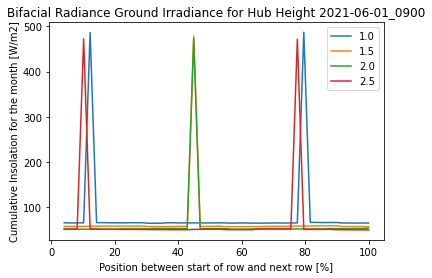

In [76]:
dates=['2021-06-01_0900'] #2021-06-01_1100', '2021-06-01_1200', '2021-06-01_1300', '2021-06-01_1400', '2021-06-01_1500'
for date in dates:
    for hh in range (0, len(hub_heights)):
        hub_height = hub_heights[hh]
        from bifacialvf import loadVFresults
        Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_2\results\irr_1axis_'+date+'Rad_Experiment2_HubHeight_'+str(hub_height)+'.csv'
        print(Radiance_File)
        (data2, metadata) = loadVFresults(Radiance_File)
        data_line = data2
        data_line_f = data_line[::-1].reset_index(drop = True) 
        data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "rearZ",data_line_f.columns[4]: "matttype",data_line_f.columns[5]: "rearMat,",data_line_f.columns[6]: "Wm2Front",data_line_f.columns[7]: "Wm2Back",data_line_f.columns[8]: "Back/FrontRatio"}, inplace = True)
        yshift = data_line_f['y'] # Shift x_axis so it starts at 0 and not -1
        ystep = (yshift/pitch_def)*100
        module_end = (2/pitch_def)*100 #Percentage between rows where the module ends)
        plt.figure(1)
        Radiance = plt.plot(ystep,data_line_f['Wm2Front'], label=hub_height)
        plt.title('Bifacial Radiance Ground Irradiance for Hub Height '+date)
        plt.xlabel('Position between start of row and next row [%]')
        plt.ylabel('Cumulative Insolation for the month [W/m2]')
        plt.legend()